In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

# Ignoring Unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go


In [2]:

geo_location = pd.read_csv('/Users/Teju/AnalytixCourse/Ass1/data/Python Foundation End to End Case Study E-Commerce Analytics Project (2)/GEO_LOCATION.csv')

order_payments = pd.read_csv('/Users/Teju/AnalytixCourse/Ass1/data/Python Foundation End to End Case Study E-Commerce Analytics Project (2)/ORDER_PAYMENTS.csv')

order_review_ratings = pd.read_csv('/Users/Teju/AnalytixCourse/Ass1/data/Python Foundation End to End Case Study E-Commerce Analytics Project (2)/ORDER_REVIEW_RATINGS.csv')

orders = pd.read_csv('/Users/Teju/AnalytixCourse/Ass1/data/Python Foundation End to End Case Study E-Commerce Analytics Project (2)/ORDERS.csv')

products = pd.read_csv('/Users/Teju/AnalytixCourse/Ass1/data/Python Foundation End to End Case Study E-Commerce Analytics Project (2)/PRODUCTS.csv')

sellers = pd.read_csv('/Users/Teju/AnalytixCourse/Ass1/data/Python Foundation End to End Case Study E-Commerce Analytics Project (2)/SELLERS.csv')

order_items = pd.read_csv('/Users/Teju/AnalytixCourse/Ass1/data/Python Foundation End to End Case Study E-Commerce Analytics Project (2)/ORDER_ITEMS.csv')

customers = pd.read_csv('/Users/Teju/AnalytixCourse/Ass1/data/Python Foundation End to End Case Study E-Commerce Analytics Project (2)/CUSTOMERS.csv')


In [3]:
order_payments.info()
#no missing values and dtatypes seem appropiate for all variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [4]:
order_review_ratings.info()
#no missing values 
#the variables required for our analysis do not need data type correction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
orders.info()
# There are no missing values in the columns we will use for our analysis. So not treatment required. 
# order_purchase_timestamp will be changed to datetime at later stages
# We are not analysing ordered that were unavailable and cancelled. Hence, they are removed form the filewvg3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
orders.customer_id.nunique()

99441

In [7]:
orders.drop(orders.loc[orders['order_status']=='unavailable'].index, inplace=True)
orders.drop(orders.loc[orders['order_status']=='cancelled'].index, inplace=True)

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98832 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       98832 non-null  object
 1   customer_id                    98832 non-null  object
 2   order_status                   98832 non-null  object
 3   order_purchase_timestamp       98832 non-null  object
 4   order_approved_at              98672 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  98832 non-null  object
dtypes: object(8)
memory usage: 8.8+ MB


In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [10]:
products[products['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [11]:
products = products.dropna(subset = ['product_category_name'])
products.info()
# Not going to impute missing values as the columns with missing values are not useful in our analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32328 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32328 non-null  float64
 3   product_description_lenght  32328 non-null  float64
 4   product_photos_qty          32328 non-null  float64
 5   product_weight_g            32327 non-null  float64
 6   product_length_cm           32327 non-null  float64
 7   product_height_cm           32327 non-null  float64
 8   product_width_cm            32327 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [12]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [13]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
final = pd.merge(orders, customers, on = ['customer_id'], how = 'left')

In [16]:
pay = order_payments.groupby('order_id').payment_value.sum()
pay = pay.reset_index()


In [17]:
final = pd.merge(final, pay, on = ['order_id'], how = 'left')


In [18]:
cost = order_items[['order_id', 'price','freight_value']]
cost['total_price'] = cost['price'] + cost['freight_value']


In [19]:
cost = cost.groupby('order_id').total_price.sum()
cost = cost.reset_index()


In [20]:
final = pd.merge(final, cost, on = ['order_id'], how = 'left')


In [21]:
final['revenue'] = final['payment_value'] - final['total_price']

In [22]:
final['revenue'] = final.revenue.round()

In [23]:
final['Order_month'] = pd.DatetimeIndex(final['order_purchase_timestamp']).month
final['Order_mon'] = pd.DatetimeIndex(final['order_purchase_timestamp']).month_name()


final['Order_year'] = pd.DatetimeIndex(final['order_purchase_timestamp']).year
final['Order_Month_Year'] =  final['Order_year'].map(str)+ '-' + final['Order_month'].map(str)
final['week'] = pd.DatetimeIndex(final['order_purchase_timestamp']).weekofyear
final['day'] = pd.DatetimeIndex(final['order_purchase_timestamp']).day_name()

In [24]:
def week(x):
    
    if (x == 'Saturday') | (x == 'Sunday'):
       
        return 'weekend'

    else:
        return 'weekday'
    

final['Weekend/Weekday'] = final['day'].apply(lambda x: week(x))

In [25]:
final.Order_year.value_counts()

2018    53866
2017    44644
2016      322
Name: Order_year, dtype: int64

In [26]:
order_review_ratings.review_id.value_counts()

2172867fd5b1a55f98fe4608e1547b4b    3
abbfacb2964f74f6487c9c10ac46daa6    3
2d6ac45f859465b5c185274a1c929637    3
832acec9bbf4efe65c3fb6423d8b4ed7    3
4219a80ab469e3fc9901437b73da3f75    3
                                   ..
1ee1ab82bfc7812f9bc3fc13eed58c38    1
3206a2afb959946a223eafa1f972efb1    1
601080b8c0cb7f308e9560435e89b229    1
20ca25b79aecd18e0d5bb142ac83481c    1
efe49f1d6f951dd88b51e6ccd4cc548f    1
Name: review_id, Length: 99173, dtype: int64

In [27]:
order_review_ratings.loc[order_review_ratings['review_id'] == '2172867fd5b1a55f98fe4608e1547b4b']

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
15243,2172867fd5b1a55f98fe4608e1547b4b,559d606ac642899e44550f194fec7e08,5,2/15/2018 0:00,2/26/2018 15:53
28806,2172867fd5b1a55f98fe4608e1547b4b,ac6e61336e852cdc45fe59ada3763a66,5,2/15/2018 0:00,2/26/2018 15:53
54384,2172867fd5b1a55f98fe4608e1547b4b,e11ba7fd8fe0728dcd89efddcda9fb11,5,2/15/2018 0:00,2/26/2018 15:53


In [28]:
review_ratings = order_review_ratings.drop_duplicates( ['order_id'] , keep='first')

In [29]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98832 entries, 0 to 98831
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98832 non-null  object 
 1   customer_id                    98832 non-null  object 
 2   order_status                   98832 non-null  object 
 3   order_purchase_timestamp       98832 non-null  object 
 4   order_approved_at              98672 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  98832 non-null  object 
 8   customer_unique_id             98832 non-null  object 
 9   customer_zip_code_prefix       98832 non-null  int64  
 10  customer_city                  98832 non-null  object 
 11  customer_state                 98832 non-null  object 
 12  payment_value                  98831 non-null 

In [30]:
final.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_value', 'total_price', 'revenue',
       'Order_month', 'Order_mon', 'Order_year', 'Order_Month_Year', 'week',
       'day', 'Weekend/Weekday'],
      dtype='object')

In [31]:
final =final[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_value', 'total_price', 'revenue',
       'Order_month', 'Order_year', 'Order_Month_Year', 'week', 'day',
       'Weekend/Weekday', 'Order_mon']]

In [32]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98832 entries, 0 to 98831
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  98832 non-null  object 
 1   customer_id               98832 non-null  object 
 2   order_status              98832 non-null  object 
 3   order_purchase_timestamp  98832 non-null  object 
 4   customer_zip_code_prefix  98832 non-null  int64  
 5   customer_city             98832 non-null  object 
 6   customer_state            98832 non-null  object 
 7   payment_value             98831 non-null  float64
 8   total_price               98660 non-null  float64
 9   revenue                   98659 non-null  float64
 10  Order_month               98832 non-null  int64  
 11  Order_year                98832 non-null  int64  
 12  Order_Month_Year          98832 non-null  object 
 13  week                      98832 non-null  int64  
 14  day   

In [33]:
final[final['total_price'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state,payment_value,total_price,revenue,Order_month,Order_year,Order_Month_Year,week,day,Weekend/Weekday,Order_mon
1126,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,8/28/2018 15:26,1151,Akkarampalle,Andhra Pradesh,0.00,NaN,NaN,8,2018,2018-8,35,Tuesday,weekday,August
1795,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,9/20/2018 13:54,33030,NavagamGhed,Gujarat,191.46,NaN,NaN,9,2018,2018-9,38,Thursday,weekday,September
1861,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,3/4/2017 12:14,68742,Tigri,Delhi,139.96,NaN,NaN,3,2017,2017-3,9,Saturday,weekend,March
2022,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,8/29/2018 16:27,13059,Alwal,Andhra Pradesh,66.44,NaN,NaN,8,2018,2018-8,35,Wednesday,weekday,August
2153,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,5/1/2017 16:12,5752,Akkarampalle,Andhra Pradesh,72.90,NaN,NaN,5,2017,2017-5,18,Monday,weekday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97101,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,7/2/2017 15:38,29156,Ziauddin Pur,Delhi,157.13,NaN,NaN,7,2017,2017-7,26,Sunday,weekend,July
97816,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,9/28/2017 15:02,12940,Patancheru,Andhra Pradesh,280.20,NaN,NaN,9,2017,2017-9,39,Thursday,weekday,September
98306,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,8/7/2018 11:16,9810,Adoni,Andhra Pradesh,54.42,NaN,NaN,8,2018,2018-8,32,Tuesday,weekday,August
98676,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,8/31/2018 16:13,11075,Kyathampalle,Andhra Pradesh,63.89,NaN,NaN,8,2018,2018-8,35,Friday,weekday,August


In [34]:
final = final.dropna(subset = ['payment_value'])
final = final.dropna(subset = ['total_price'])
final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98659 entries, 0 to 98831
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  98659 non-null  object 
 1   customer_id               98659 non-null  object 
 2   order_status              98659 non-null  object 
 3   order_purchase_timestamp  98659 non-null  object 
 4   customer_zip_code_prefix  98659 non-null  int64  
 5   customer_city             98659 non-null  object 
 6   customer_state            98659 non-null  object 
 7   payment_value             98659 non-null  float64
 8   total_price               98659 non-null  float64
 9   revenue                   98659 non-null  float64
 10  Order_month               98659 non-null  int64  
 11  Order_year                98659 non-null  int64  
 12  Order_Month_Year          98659 non-null  object 
 13  week                      98659 non-null  int64  
 14  day   

In [35]:
# Renaming/grouping the productsduct categories for less granularity

products['New_cat'] = np.where(products.product_category_name == 'Bed_Bath_Table', 'Furniture',
                      np.where(products.product_category_name == 'Sports_Leisure', 'Sports_Leisure',
                      np.where(products.product_category_name == 'Furniture_Decor', 'Furniture',
                      np.where(products.product_category_name == 'Health_Beauty', 'Health_Beauty',
                      np.where(products.product_category_name == 'Housewares', 'Housewares',
                      np.where(products.product_category_name == 'Auto', 'Auto',
                      np.where(products.product_category_name == 'Computers_Accessories', 'Computers_Accessories',
                      np.where(products.product_category_name == 'Toys', 'Toys',
                      np.where(products.product_category_name == 'Watches_Gifts', 'Watches_Gifts',
                      np.where(products.product_category_name == 'Telephony', 'Telephony',
                      np.where(products.product_category_name == 'Baby', 'Baby',
                      np.where(products.product_category_name == 'Perfumery', 'Health_Beauty',
                      np.where(products.product_category_name == 'Fashion_Bags_Accessories', 'Fashion',
                      np.where(products.product_category_name == 'Stationery', 'Stationery',
                      np.where(products.product_category_name == 'Cool_Stuff', 'Cool_Stuff',
                      np.where(products.product_category_name == 'Garden_Tools', 'Garden_Tools',
                      np.where(products.product_category_name == 'Pet_Shop', 'Pet_Shop',
                      np.where(products.product_category_name == 'Electronics', 'Electronics',
                      np.where(products.product_category_name == 'Construction_Tools_Construction', 'Construction',
                      np.where(products.product_category_name == 'Home_Appliances', 'Appliances',
                      np.where(products.product_category_name == 'Luggage_Accessories', 'Luggage_Accessories',
                      np.where(products.product_category_name == 'Office_Furniture', 'Furniture',
                      np.where(products.product_category_name == 'Musical_Instruments', 'Musical_Instruments',
                      np.where(products.product_category_name == 'Small_Appliances', 'Appliances',
                      np.where(products.product_category_name == 'Home_Construction', 'Construction',
                      np.where(products.product_category_name == 'Books_General_Interest', 'Books','others'))))))))))))))))))))))))))
                      

In [36]:
products = products[['product_id','New_cat']]

1. Perform Detailed exploratory analysis

a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total
products, Total categories, Total sellers, Total locations, Total channels, Total
payment methods etc...)

b. Understanding how many new customers acquired every month

c. Understand the retention of customers on month on month basis

d. How the revenues from existing/new customers on month on month basis

e. Understand the trends/seasonality of sales, quantity by category, location, month,
week, day, time, channel, payment method etc...

f. Popular Products by month, seller, state, category.

g. Popular categories by state, month

h. List top 10 most expensive products sorted by price

In [37]:
print("Total revenue : " ,final.revenue.sum())

Total revenue :  2878.0


In [38]:
print("Total orders : " , orders.order_id.count())

Total orders :  98832


In [39]:
print("Total products : " ,products.product_id.nunique())

Total products :  32328


In [40]:
print("Total seller : " ,order_items.seller_id.nunique())

Total seller :  3095


In [41]:
print("Total locations : " ,final.customer_city.nunique())

Total locations :  4110


In [42]:
print("Total payment methods : " ,order_payments.payment_type.nunique())

Total payment methods :  5


# Understanding how many new customers acquired every month

In [43]:
cus = final[['customer_id', 'order_purchase_timestamp', 'Order_year','Order_month','Order_Month_Year']]
cus.sort_values( by = ['Order_year','Order_month'] , ascending=True).reset_index()

cus1 = cus[['customer_id','Order_year','Order_month','Order_Month_Year']]
cus1 = cus1.drop_duplicates( "customer_id" , keep='first')
cus1 = cus1.sort_values( by = ['Order_year','Order_month'] , ascending=True)


In [44]:
cus1 = cus1.reset_index()
new_c = cus1.Order_Month_Year.value_counts(sort=False)
new_c.reset_index()

,index,Order_Month_Year
0,2016-9,2
1,2016-10,302
2,2016-12,1
3,2017-1,789
4,2017-2,1733
5,2017-3,2641
6,2017-4,2391
7,2017-5,3660
8,2017-6,3217
9,2017-7,3969


In [45]:
ret = cus[['customer_id','Order_year','Order_month','Order_Month_Year']]
ret = ret.sort_values( by = ['Order_year','Order_month'] , ascending=True).reset_index()
ret = ret.Order_Month_Year.value_counts(sort=False).reset_index()

In [46]:
ret['cus_loss']=ret['Order_Month_Year'] - ret['Order_Month_Year'].shift(1)

ret.columns = ['period','Order_Month_Year','cus_loss']

In [47]:
ret

,period,Order_Month_Year,cus_loss
0,2016-9,2,NaN
1,2016-10,302,300.0
2,2016-12,1,-301.0
3,2017-1,789,788.0
4,2017-2,1733,944.0
5,2017-3,2641,908.0
6,2017-4,2391,-250.0
7,2017-5,3660,1269.0
8,2017-6,3217,-443.0
9,2017-7,3969,752.0


<AxesSubplot:xlabel='period', ylabel='cus_loss'>

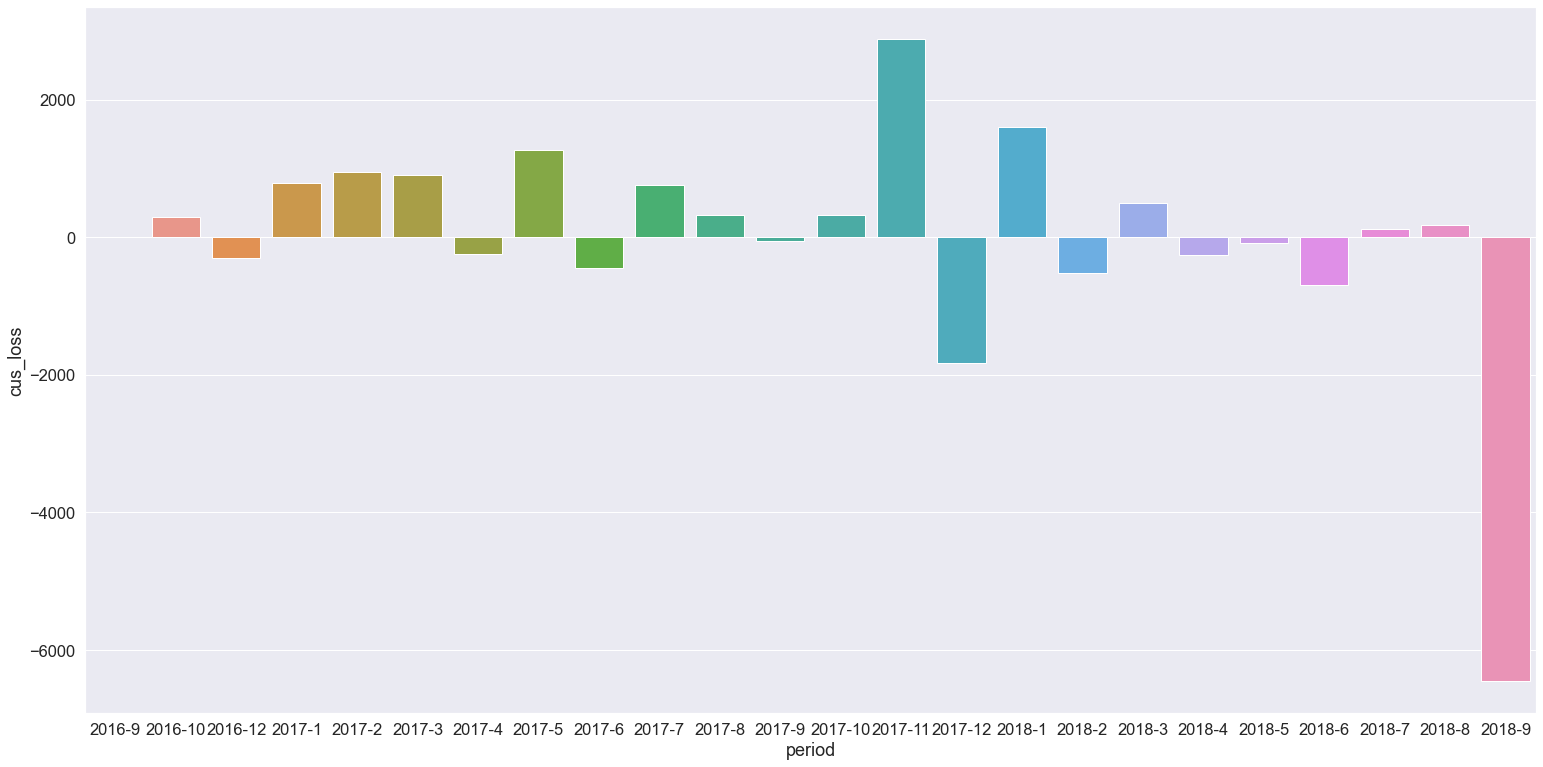

In [48]:
plt.figure(figsize=(26,13))
sns.barplot(x=ret.period, y=ret.cus_loss)

# the revenues from existing/new customers on month on month basis



In [49]:
rev = final[['Order_Month_Year', 'revenue', 'Order_year','Order_month']].groupby(['Order_year','Order_month','Order_Month_Year']).revenue.sum().reset_index()

<AxesSubplot:xlabel='Order_Month_Year', ylabel='revenue'>

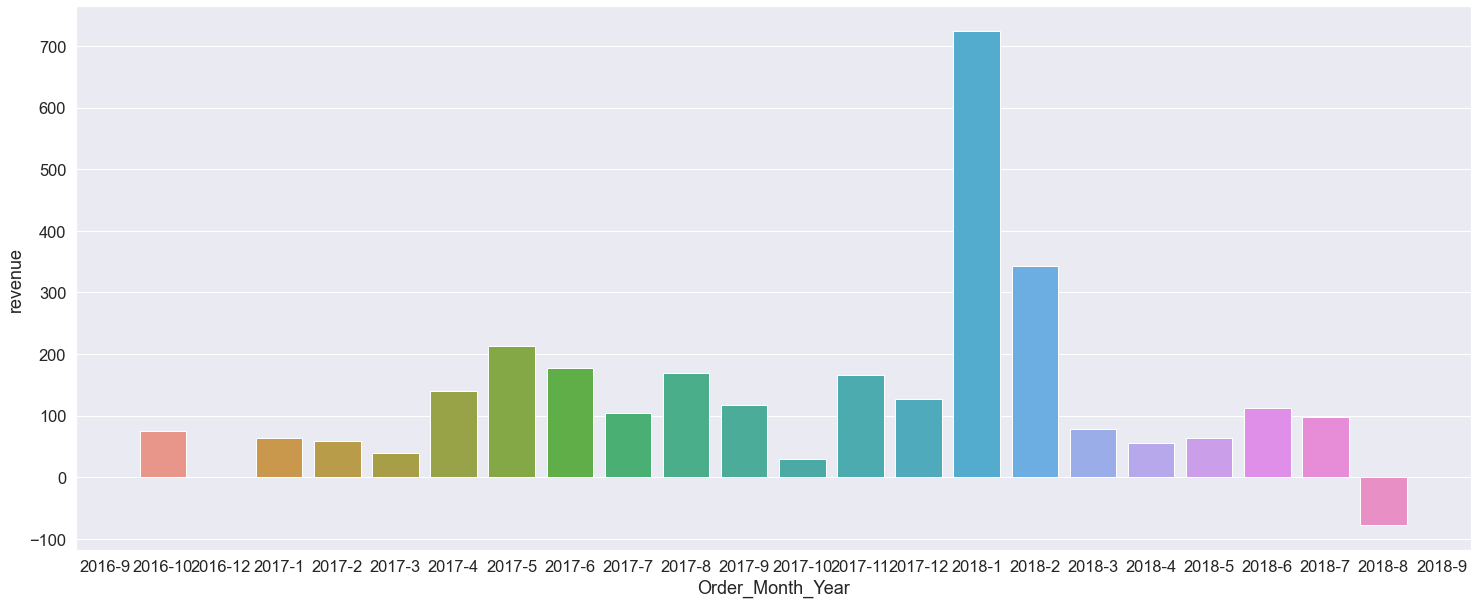

In [50]:
plt.figure(figsize=(25,10))
sns.barplot(data=rev, x="Order_Month_Year", y="revenue")

e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc...



In [51]:
final.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_value', 'total_price', 'revenue', 'Order_month', 'Order_year',
       'Order_Month_Year', 'week', 'day', 'Weekend/Weekday', 'Order_mon'],
      dtype='object')

In [115]:
season = final[['revenue','Order_Month_Year', 'week','Weekend/Weekday','customer_state', 'Order_mon']]

In [116]:
season

,revenue,Order_Month_Year,week,Weekend/Weekday,customer_state,Order_mon
0,0.0,2017-10,40,weekday,Andhra Pradesh,October
1,0.0,2018-7,30,weekday,Chhattisgarh,July
2,0.0,2018-8,32,weekday,Chhattisgarh,August
3,0.0,2017-11,46,weekend,Punjab,November
4,0.0,2018-2,7,weekday,Andhra Pradesh,February
...,...,...,...,...,...,...
98827,0.0,2017-3,10,weekday,Andhra Pradesh,March
98828,0.0,2018-2,6,weekday,Haryana,February
98829,0.0,2017-8,34,weekend,Rajasthan,August
98830,0.0,2018-1,2,weekday,Punjab,January


# Revenue by day

<AxesSubplot:xlabel='Weekend/Weekday', ylabel='revenue'>

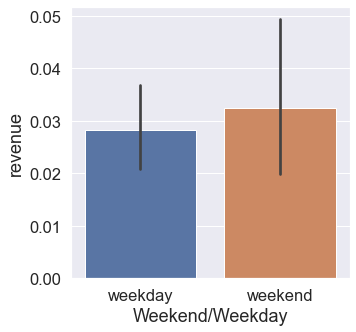

In [54]:
plt.figure(figsize=(5,5))
sns.barplot(data=season, x="Weekend/Weekday", y="revenue")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'October'),
  Text(1, 0, 'July'),
  Text(2, 0, 'August'),
  Text(3, 0, 'November'),
  Text(4, 0, 'February'),
  Text(5, 0, 'April'),
  Text(6, 0, 'May'),
  Text(7, 0, 'January'),
  Text(8, 0, 'June'),
  Text(9, 0, 'March'),
  Text(10, 0, 'December'),
  Text(11, 0, 'September')])

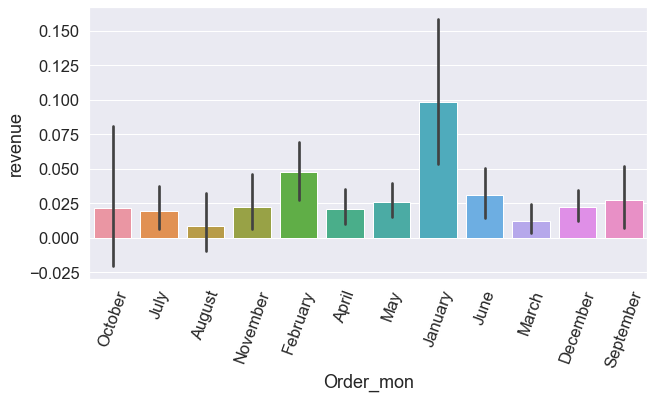

In [119]:
plt.figure(figsize=(10,5))
sns.barplot(data=season, x="Order_mon", y="revenue")
plt.xticks(rotation=70)

# Revenue based on state

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Chhattisgarh'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Uttar Pradesh'),
  Text(4, 0, 'Himachal Pradesh'),
  Text(5, 0, 'Jammu & Kashmir'),
  Text(6, 0, 'Tamil Nadu'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Karnataka'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Maharashtra'),
  Text(11, 0, 'Madhya Pradesh'),
  Text(12, 0, 'Delhi'),
  Text(13, 0, 'Arunachal Pradesh'),
  Text(14, 0, 'Orissa'),
  Text(15, 0, 'Uttaranchal'),
  Text(16, 0, 'West Bengal'),
  Text(17, 0, 'Kerala'),
  Text(18, 0, 'Rajasthan'),
  Text(19, 0, 'Goa')])

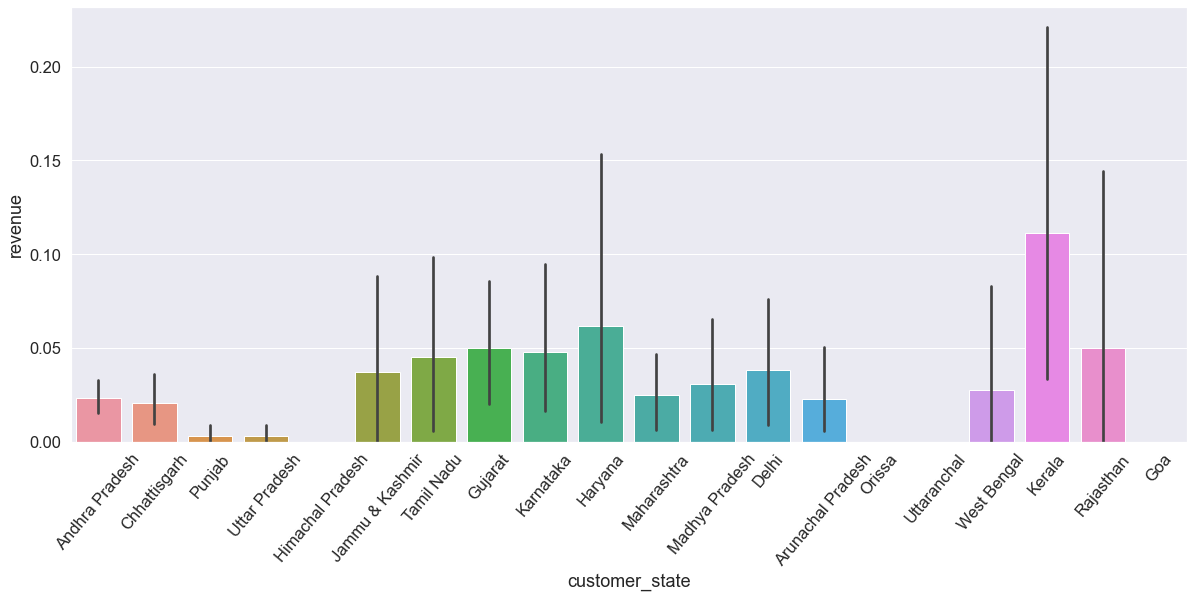

In [55]:
plt.figure(figsize=(20,8))
sns.barplot(data=season, x="customer_state", y="revenue")
plt.xticks(rotation=50)

# Revenue by state

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Chhattisgarh'),
  Text(2, 0, 'Punjab'),
  Text(3, 0, 'Uttar Pradesh'),
  Text(4, 0, 'Himachal Pradesh'),
  Text(5, 0, 'Jammu & Kashmir'),
  Text(6, 0, 'Tamil Nadu'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Karnataka'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Maharashtra'),
  Text(11, 0, 'Madhya Pradesh'),
  Text(12, 0, 'Delhi'),
  Text(13, 0, 'Arunachal Pradesh'),
  Text(14, 0, 'Orissa'),
  Text(15, 0, 'Uttaranchal'),
  Text(16, 0, 'West Bengal'),
  Text(17, 0, 'Kerala'),
  Text(18, 0, 'Rajasthan'),
  Text(19, 0, 'Goa')])

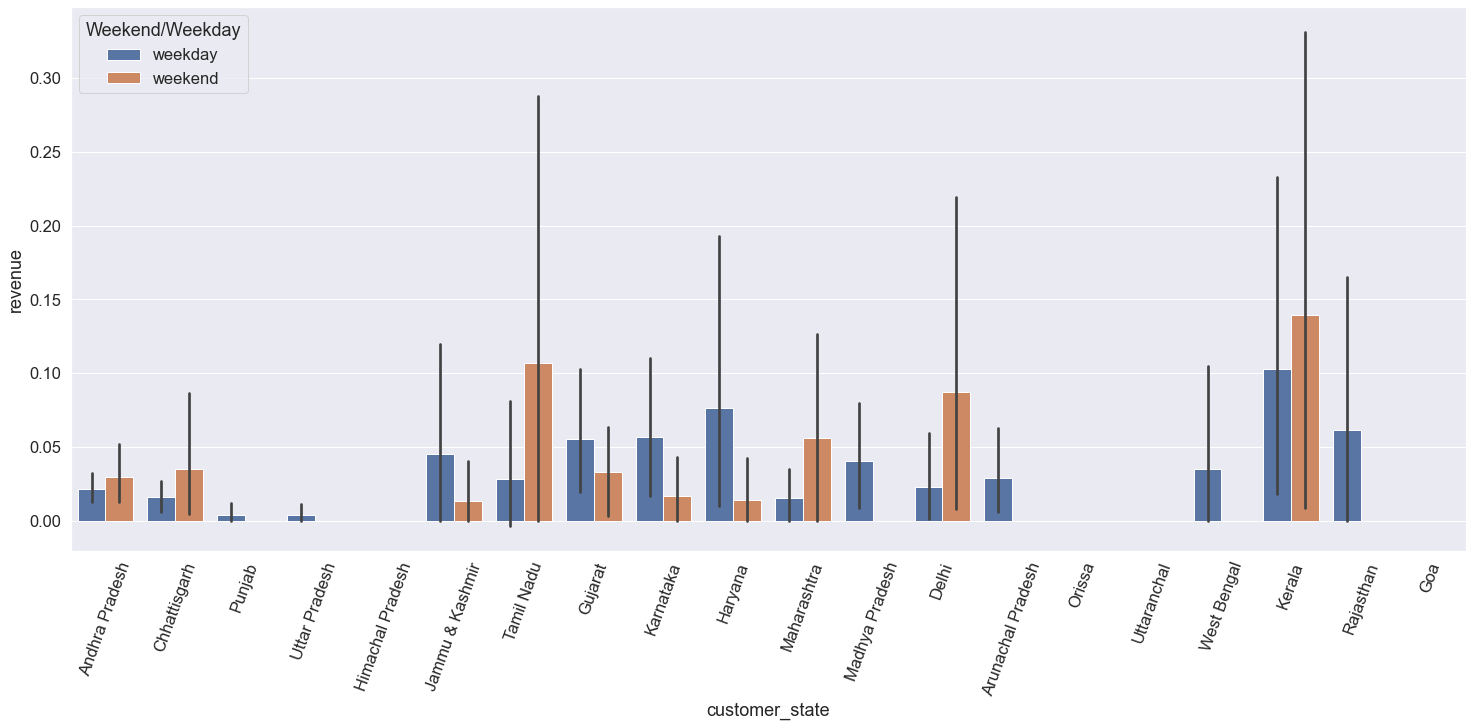

In [56]:
plt.figure(figsize=(25,10))
sns.barplot(data=season, x="customer_state", y="revenue", hue = "Weekend/Weekday")
plt.xticks(rotation=70)

# Most popular payment channel 

In [57]:
pay_type = order_payments.groupby('payment_type').payment_value.sum().reset_index()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UPI'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'debit_card'),
  Text(3, 0, 'not_defined'),
  Text(4, 0, 'voucher')])

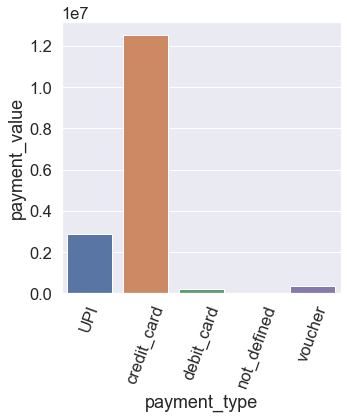

In [58]:
plt.figure(figsize=(5,5))
sns.barplot(data=pay_type, x="payment_type", y="payment_value")
plt.xticks(rotation=70)

# Popularity of products

In [59]:
oip = pd.merge(order_items, products, on = 'product_id', how = 'left')
oip = oip[['order_id','product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'New_cat']]

In [60]:
oi_p = oip.New_cat.value_counts().reset_index()

In [61]:
oi_p.columns = ['New_cat','Count']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Health_Beauty'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Sports_Leisure'),
  Text(4, 0, 'Computers_Accessories'),
  Text(5, 0, 'Housewares'),
  Text(6, 0, 'Watches_Gifts'),
  Text(7, 0, 'Telephony'),
  Text(8, 0, 'Garden_Tools'),
  Text(9, 0, 'Auto'),
  Text(10, 0, 'Toys'),
  Text(11, 0, 'Cool_Stuff'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Electronics'),
  Text(14, 0, 'Stationery'),
  Text(15, 0, 'Fashion'),
  Text(16, 0, 'Pet_Shop'),
  Text(17, 0, 'Construction'),
  Text(18, 0, 'Appliances'),
  Text(19, 0, 'Luggage_Accessories'),
  Text(20, 0, 'Musical_Instruments'),
  Text(21, 0, 'Books')])

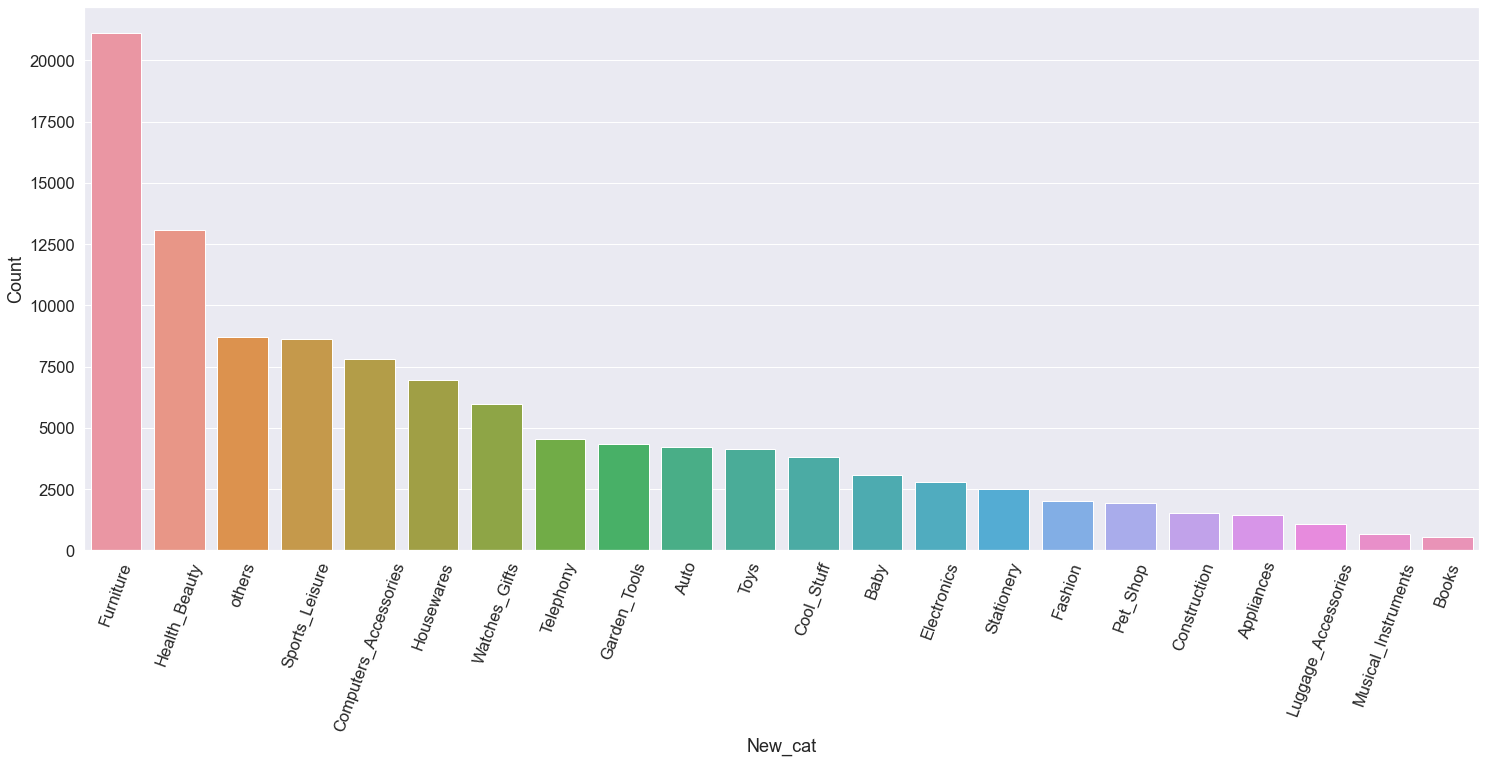

In [62]:
plt.figure(figsize=(25,10))
sns.barplot(data=oi_p, x="New_cat", y="Count")
plt.xticks(rotation=70)

f. Popular Products by month, seller, state,

In [63]:
oipo = pd.merge(oip,orders, on = 'order_id', how = 'left')

oipo['Order_month'] = pd.DatetimeIndex(oipo['order_purchase_timestamp']).month

oipo['Order_mon'] = pd.DatetimeIndex(oipo['order_purchase_timestamp']).month_name()
oipo['Order_year'] = pd.DatetimeIndex(oipo['order_purchase_timestamp']).year
oipo['Order_Month_Year'] =  oipo['Order_year'].map(str)+ '-' + oipo['Order_month'].map(str)


In [64]:
oipo = oipo[['order_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'New_cat', 'customer_id', 'order_status',
       'order_purchase_timestamp','Order_month', 'Order_year',
       'Order_Month_Year','Order_mon']]

# Populrity of products by month

In [114]:
pop_pro = pd.crosstab(index = oipo.New_cat, columns = oipo['Order_mon'])


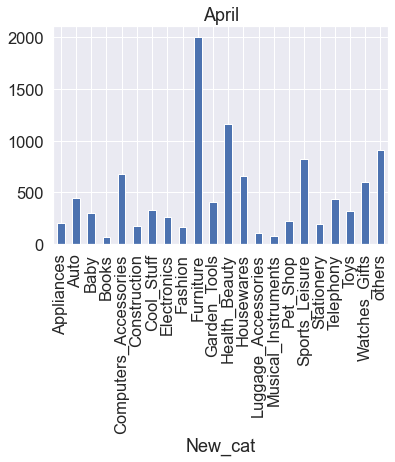

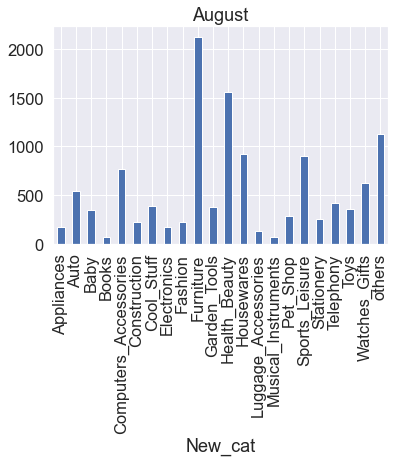

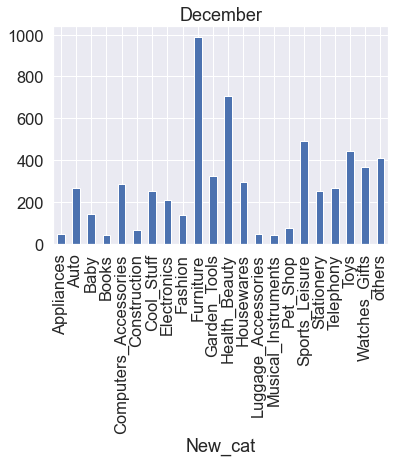

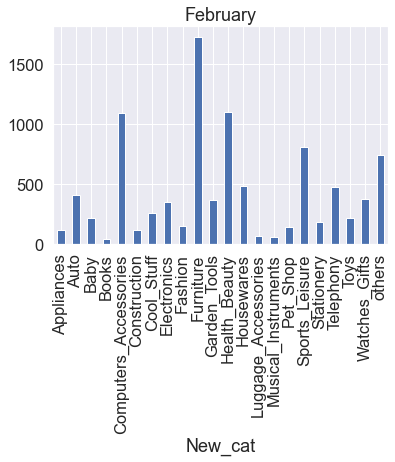

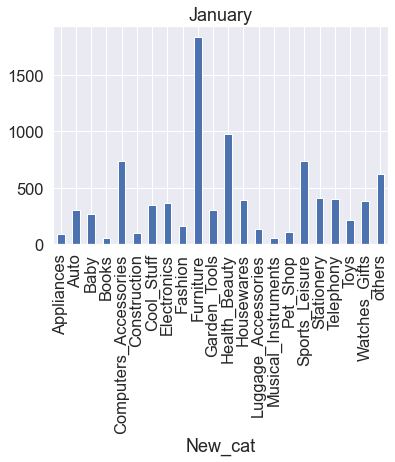

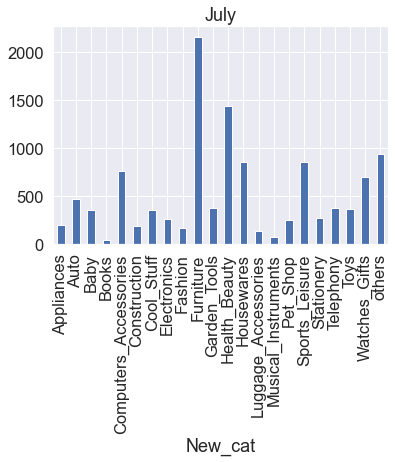

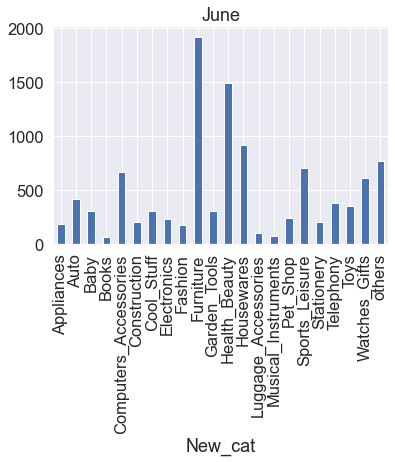

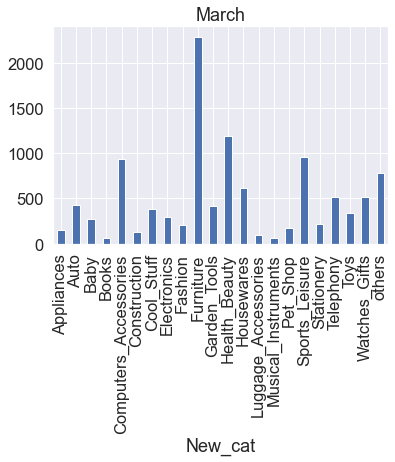

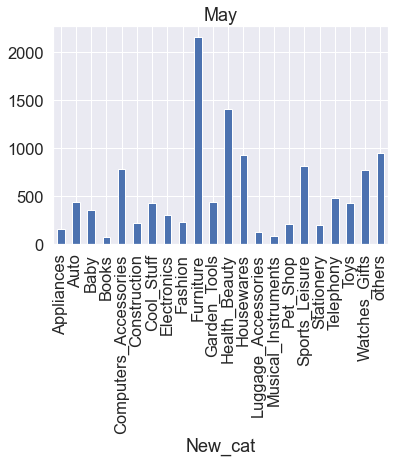

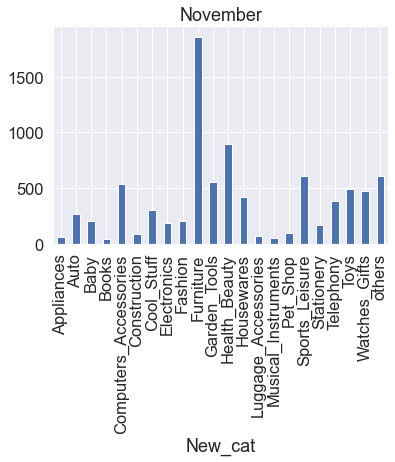

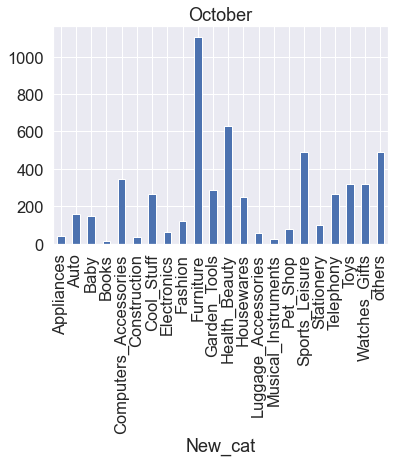

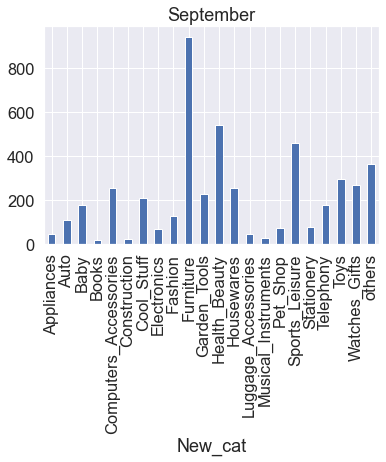

In [121]:
for i, col in enumerate(pop_pro.columns):
    pop_pro[col].plot(fig=plt.figure(i), kind = 'bar')
    plt.title(col)
plt.show()

# Popularity of products by state

In [67]:
state = pd.merge(oipo , final[['order_id','customer_state']], on = 'order_id', how = 'left')

In [68]:
pop_state = pd.crosstab(index = state.New_cat, columns = state['customer_state'])
pop_state

customer_state,Andhra Pradesh,Arunachal Pradesh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Orissa,Punjab,Rajasthan,Tamil Nadu,Uttar Pradesh,Uttaranchal,West Bengal
New_cat,,,,,,,,,,,,,,,,,,,,
Appliances,869,16,80,43,0,128,19,18,24,56,27,34,38,12,12,12,35,20,1,6
Auto,2324,46,302,163,1,361,105,32,64,207,85,140,107,34,30,48,100,64,2,19
Baby,1881,41,193,92,0,248,58,27,42,139,44,73,56,13,14,15,64,42,2,19
Books,326,7,40,36,0,34,8,3,7,30,7,20,15,2,5,2,7,4,0,0
Computers_Accessories,4859,69,471,279,0,607,169,66,111,281,80,230,156,47,68,70,144,80,7,33
Construction,914,24,86,57,1,149,59,9,26,53,16,38,17,6,6,8,41,7,3,13
Cool_Stuff,2131,56,240,128,1,310,78,37,66,156,71,146,93,35,30,47,99,36,12,23
Electronics,1686,27,173,111,1,203,50,22,39,114,45,98,45,18,17,22,59,24,1,11
Fashion,1200,20,126,70,0,170,44,24,42,82,37,68,36,11,17,10,36,27,3,8


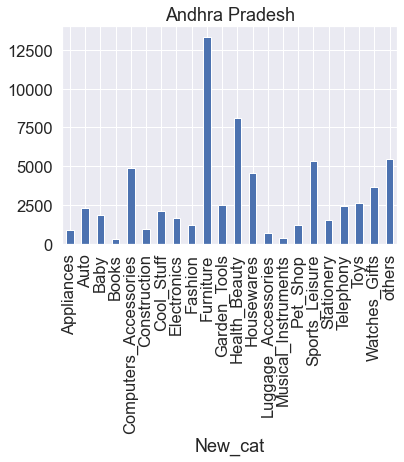

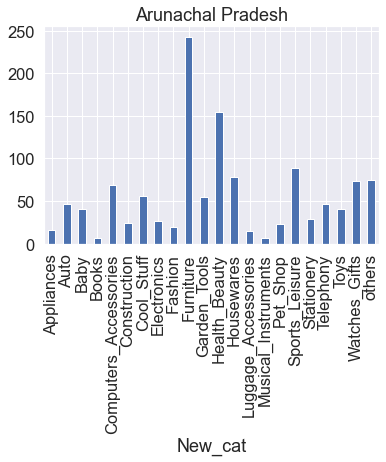

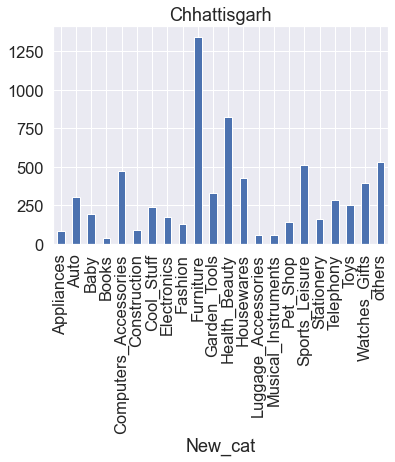

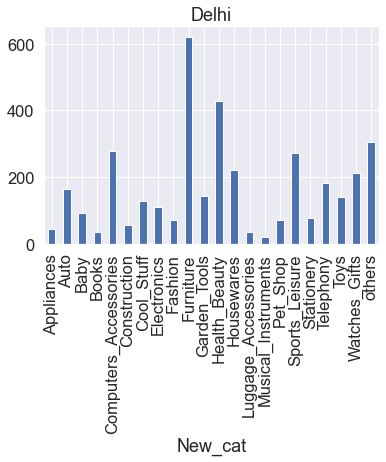

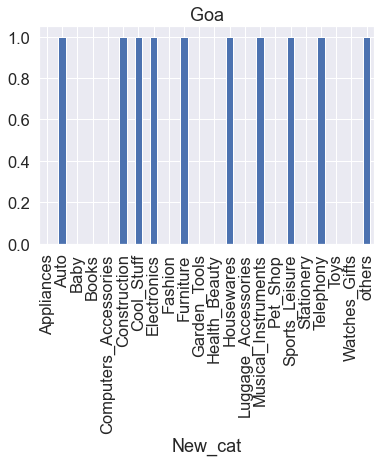

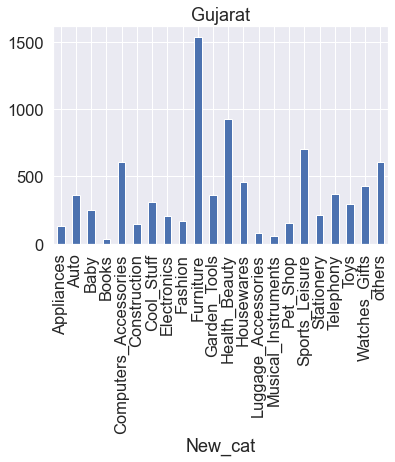

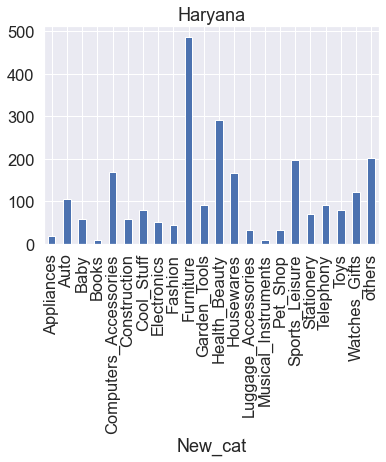

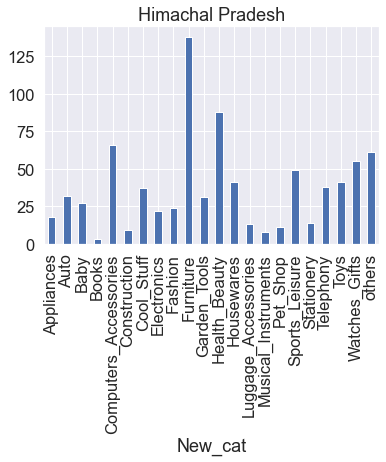

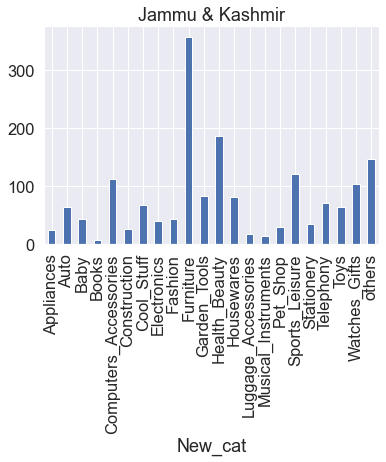

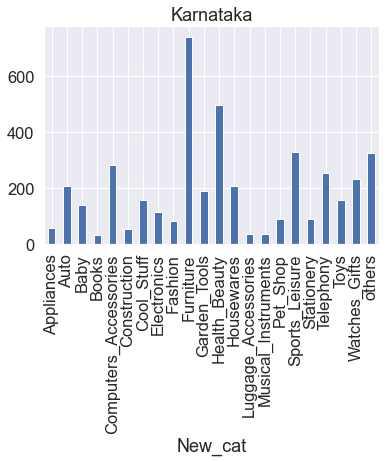

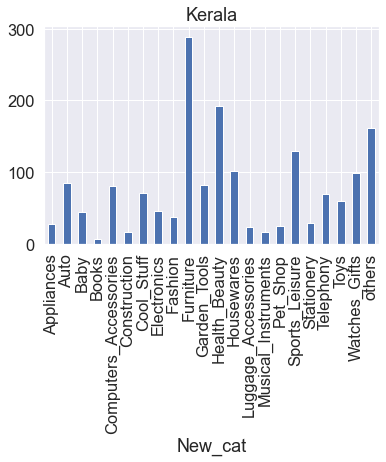

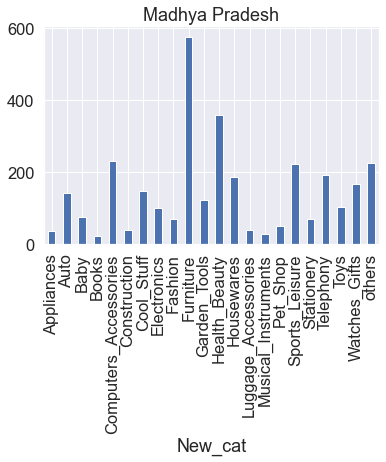

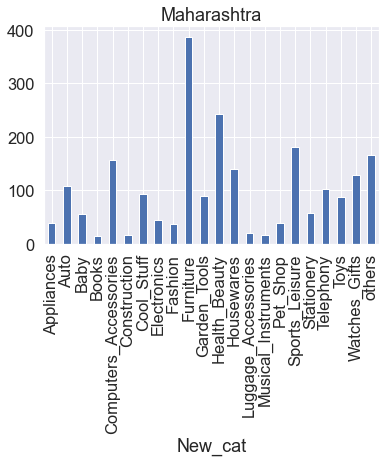

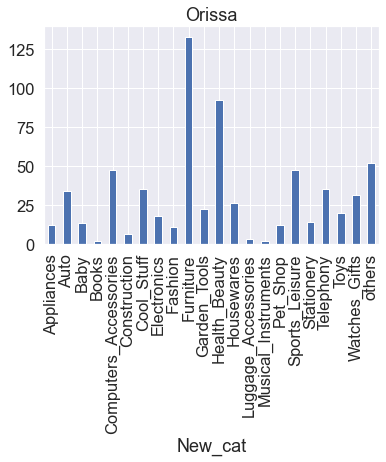

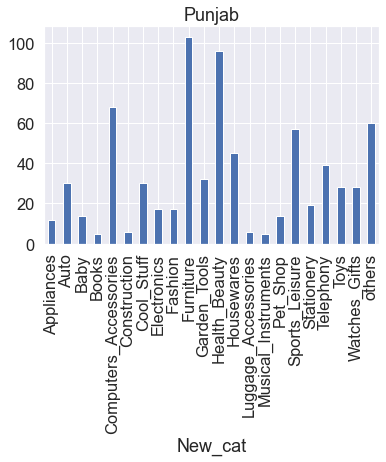

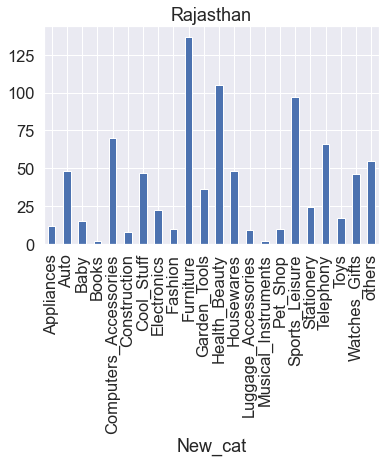

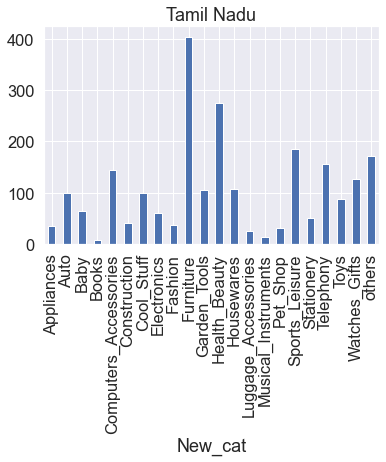

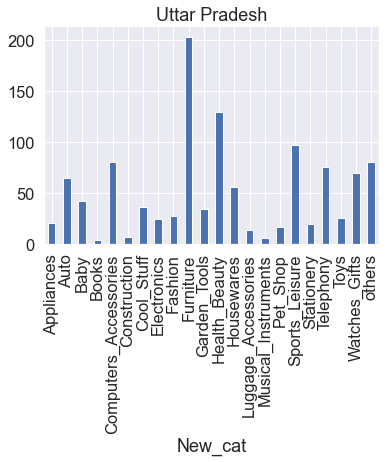

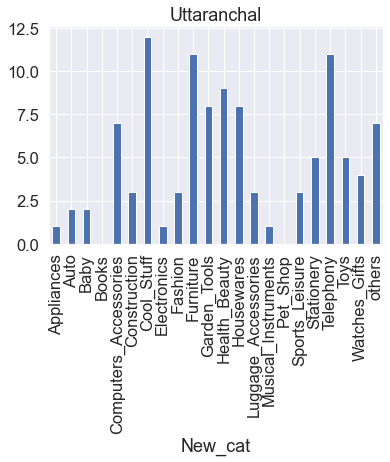

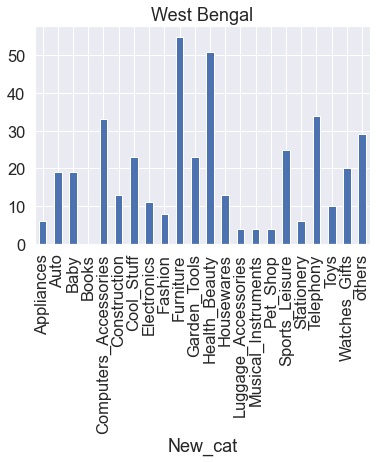

In [69]:

for i, col in enumerate(pop_state.columns):
    pop_state[col].plot(fig=plt.figure(i), kind = 'bar')
    plt.title(col)
plt.show()

# Products sold by top 3 sellers

In [70]:
sell = state[['seller_id','New_cat']]

In [71]:
top_seller = sell.groupby('seller_id').New_cat.count().reset_index().sort_values(by = 'New_cat' , ascending = False)

In [72]:
top_seller.head(5)

,seller_id,New_cat
1235,6560211a19b47992c3666cc44a7e94c0,2033
881,4a3ca9315b744ce9f8e9374361493884,1987
368,1f50f920176fa81dab994f9023523100,1931
2481,cc419e0650a3c5ba77189a1882b7556a,1775
2643,da8622b14eb17ae2831f4ac5b9dab84a,1551


In [73]:
oipo.loc[oipo.seller_id == '6560211a19b47992c3666cc44a7e94c0'].New_cat.value_counts()

Watches_Gifts            1628
Fashion                   340
others                     33
Health_Beauty              13
Computers_Accessories      12
Sports_Leisure              7
Name: New_cat, dtype: int64

In [74]:
oipo.loc[oipo.seller_id == '4a3ca9315b744ce9f8e9374361493884'].New_cat.value_counts()

Furniture     1657
others         269
Toys            55
Baby             5
Cool_Stuff       1
Name: New_cat, dtype: int64

In [75]:
oipo.loc[oipo.seller_id == '1f50f920176fa81dab994f9023523100'].New_cat.value_counts()

Garden_Tools    1882
Baby              42
others             7
Name: New_cat, dtype: int64

# List top 10 most expensive products sorted by price

In [76]:
top10 = oipo[['New_cat','product_id','price']].sort_values(by = 'price', ascending = False).head(15)

In [77]:
pro = pd.read_csv('/Users/Teju/AnalytixCourse/Ass1/data/Python Foundation End to End Case Study E-Commerce Analytics Project (2)/PRODUCTS.csv')

In [78]:
pro = pro[['product_id','product_category_name']]

In [79]:
pd.merge(top10, pro, on = 'product_id', how = 'left').product_category_name

0              Housewares
1               Computers
2                     Art
3        Small_Appliances
4        Small_Appliances
5               Computers
6     Musical_Instruments
7          Consoles_Games
8          Sports_Leisure
9           Watches_Gifts
10       Small_Appliances
11                    NaN
12           Garden_Tools
13                   Baby
14          Watches_Gifts
Name: product_category_name, dtype: object

Performing Customers/sellers Segmentation

a. Divide the customers into groups based on the revenue generated

b. Divide the sellers into groups based on the revenue generated

In [80]:
def cat_cus(x):
    
    if x < 0:
        return 'Negetive'
    
    elif (x >= 0) & (x < 10):
        return '0 - 9'
    
    elif (x >= 100) & (x < 100):
        return '10 - 99'
    
    elif (x >= 100) & (x < 500):
        return '100 - 499'
    
    elif (x >= 500) & (x < 1000):
        return '500 - 999'
    
    else:
        return 'above 1000'
    

final['Customer_cat($)'] = final["revenue"].apply(lambda x: cat_cus(x))

In [81]:
final['Customer_cat($)'].value_counts()

0 - 9         98545
above 1000       93
Negetive         18
100 - 499         3
Name: Customer_cat($), dtype: int64

In [82]:
seller_cat = pd.merge(order_items, sellers, on = 'seller_id', how = 'left')
seller_cat = seller_cat[['order_id','seller_id']]

In [83]:
seller_cat = seller_cat.drop_duplicates()

sel_rev = pd.merge(final, seller_cat, on = 'order_id', how = 'left')

sel_rev = sel_rev.groupby('seller_id').revenue.sum().reset_index()

sel_rev

,seller_id,revenue
0,0015a82c2db000af6aaaf3ae2ecb0532,0.0
1,001cca7ae9ae17fb1caed9dfb1094831,0.0
2,001e6ad469a905060d959994f1b41e4f,0.0
3,002100f778ceb8431b7a1020ff7ab48f,0.0
4,003554e2dce176b5555353e4f3555ac8,0.0
...,...,...
3087,ffcfefa19b08742c5d315f2791395ee5,0.0
3088,ffdd9f82b9a447f6f8d4b91554cc7dd3,0.0
3089,ffeee66ac5d5a62fe688b9d26f83f534,0.0
3090,fffd5413c0700ac820c7069d66d98c89,0.0


In [84]:
def cat_sel(x):
    
    if x < 0:
        return 'Negetive'
    
    elif (x >= 0) & (x < 10):
        return '0 - 9'
    
    elif (x >= 100) & (x < 100):
        return '10 - 99'
    
    elif (x >= 100) & (x < 500):
        return '100 - 499'
    
    elif (x >= 500) & (x < 1000):
        return '500 - 999'
    
    else:
        return 'above 1000'
    

sel_rev['Seller_cat'] = sel_rev["revenue"].apply(lambda x: cat_sel(x))

sel_rev.Seller_cat.value_counts()

0 - 9         2995
above 1000      80
Negetive        12
100 - 499        5
Name: Seller_cat, dtype: int64

# Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [85]:
cross = pd.merge(order_items, products , on = 'product_id', how = 'left')
cross = cross[['order_id', 'New_cat']]


In [86]:
#dict_order_items = {}
#for oid in orders:
#    dict_order_items[oid] = [oid[order_id].category]
#    for oid_x in orders:
#        if oid[order_iod] == oid_x[order_id]:
#            dict_order_items[oid].append(oid_x[order_id].category)
#        orders = orders[1:]

In [87]:
cross_sell = pd.crosstab(index = cross.order_id, columns = cross['New_cat'])

In [88]:
cross_sell = cross_sell.reset_index()
cross_sell = cross_sell[['Appliances', 'Auto', 'Baby', 'Books', 'Computers_Accessories',
       'Construction', 'Cool_Stuff', 'Electronics', 'Fashion', 'Furniture',
       'Garden_Tools', 'Health_Beauty', 'Housewares', 'Luggage_Accessories',
       'Musical_Instruments', 'Pet_Shop', 'Sports_Leisure', 'Stationery']]

In [89]:
cross_sell['nuique'] = cross_sell.nunique(axis=1)

In [90]:
c = cross_sell.loc[cross_sell.nuique > 2]

In [91]:
c = c.reset_index()

In [92]:
c = c[['Appliances', 'Auto', 'Baby', 'Books', 'Computers_Accessories',
       'Construction', 'Cool_Stuff', 'Electronics', 'Fashion', 'Furniture',
       'Garden_Tools', 'Health_Beauty', 'Housewares', 'Luggage_Accessories',
       'Musical_Instruments', 'Pet_Shop', 'Sports_Leisure', 'Stationery',
       ]]


In [93]:
c = c.where(c != 1 , c.columns.to_series(), axis=1)
c = c.where(c != 2 , c.columns.to_series(), axis=1)
c = c.where(c != 3 , c.columns.to_series(), axis=1)
c = c.where(c != 4 , c.columns.to_series(), axis=1)
c = c.where(c != 5 , c.columns.to_series(), axis=1)
c = c.where(c != 6 , c.columns.to_series(), axis=1)
c = c.where(c != 7 , c.columns.to_series(), axis=1)
c = c.where(c != 8 , c.columns.to_series(), axis=1)

In [94]:
c['concat'] = c["Appliances"].astype(str) + c["Auto"].astype(str) + c["Baby"].astype(str) + c["Computers_Accessories"].astype(str) + c["Construction"].astype(str) + c["Cool_Stuff"].astype(str) +c["Electronics"].astype(str) + c["Fashion"].astype(str) + c["Furniture"].astype(str) + c["Garden_Tools"].astype(str) + c["Health_Beauty"].astype(str) + c["Housewares"].astype(str) +c["Luggage_Accessories"].astype(str) + c["Luggage_Accessories"].astype(str) + c["Musical_Instruments"].astype(str) + c["Pet_Shop"].astype(str) + c["Sports_Leisure"].astype(str) +c["Stationery"].astype(str) 
c = c[['concat']]

In [95]:
c = c.concat.str.strip('0')

In [96]:
c = c.str.replace("0"," ")
c = c.str.replace("-"," ")
c = c.reset_index()

In [97]:
c = c.concat.value_counts()

c.head(10)

Furniture  Housewares                 11
FurnitureGarden_Tools                 10
Baby     Furniture                     8
Garden_Tools Housewares                4
Construction   Furniture               4
Baby  Cool_Stuff                       3
Computers_Accessories  Electronics     3
Furniture Health_Beauty                3
Baby        Housewares                 3
Auto      Furniture                    2
Name: concat, dtype: int64

# 4. Payment Behaviour

a. How customers are paying?

b. Which payment channels are used by most customers?

In [98]:
pay_type.payment_type

0            UPI
1    credit_card
2     debit_card
3    not_defined
4        voucher
Name: payment_type, dtype: object

<AxesSubplot:xlabel='payment_type', ylabel='payment_value'>

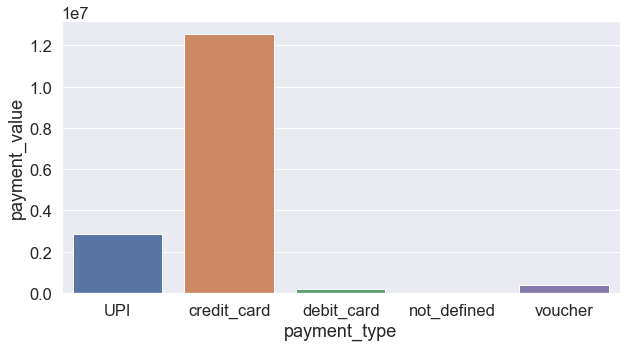

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(data=pay_type, x="payment_type", y="payment_value")


In [100]:
pay_type_c = order_payments.groupby('payment_type').payment_value.count().reset_index()
pay_type_c

,payment_type,payment_value
0,UPI,19784
1,credit_card,76795
2,debit_card,1529
3,not_defined,3
4,voucher,5775


<AxesSubplot:xlabel='payment_type', ylabel='payment_value'>

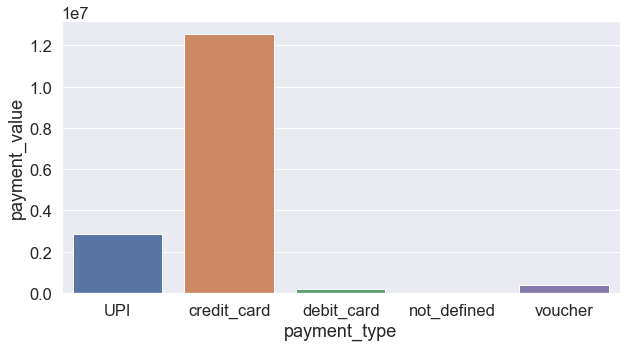

In [101]:
plt.figure(figsize=(10,5))
sns.barplot(data=pay_type, x="payment_type", y="payment_value")


# 5. Customer satisfaction towards category & product

a. Which categories (top 10) are maximum rated & minimum rated?

b. Which products (top10) are maximum rated & minimum rated?

c. Average rating by location, seller, product, category, month etc.

In [102]:
rate = pd.merge(order_items, order_review_ratings[['order_id','review_score']], on = 'order_id', how = 'left')

In [103]:
r = pd.merge(pro, rate[['product_id','review_score']], on ='product_id', how = 'left')

In [104]:
r1 = pd.crosstab(index = r.product_category_name, columns = r['review_score']).reset_index()

In [105]:
f = r1[['product_category_name',5]]

In [106]:
f.sort_values(by = 5, ascending = False).head(10)

review_score,product_category_name,5
43,Health_Beauty,5870
7,Bed_Bath_Table,5795
65,Sports_Leisure,5129
39,Furniture_Decor,4462
15,Computers_Accessories,4204
49,Housewares,3988
70,Watches_Gifts,3335
69,Toys,2518
42,Garden_Tools,2482
5,Auto,2383


In [107]:
one =  r1[['product_category_name',1]]

In [108]:
one.sort_values(by = 1, ascending = False).head(10)

review_score,product_category_name,1
7,Bed_Bath_Table,1698
39,Furniture_Decor,1293
15,Computers_Accessories,1201
43,Health_Beauty,1135
65,Sports_Leisure,1066
49,Housewares,864
70,Watches_Gifts,780
68,Telephony,597
42,Garden_Tools,571
5,Auto,530


# c. Average rating by location, seller, product, category, month etc.

In [109]:
rate.groupby('seller_id').review_score.mean().round().reset_index().head(5)

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,4.0
1,001cca7ae9ae17fb1caed9dfb1094831,4.0
2,001e6ad469a905060d959994f1b41e4f,1.0
3,002100f778ceb8431b7a1020ff7ab48f,4.0
4,003554e2dce176b5555353e4f3555ac8,5.0


In [110]:
r.groupby('product_category_name').review_score.mean().round().reset_index().head(5)

,product_category_name,review_score
0,Agro_Industry_And_Commerce,4.0
1,Air_Conditioning,4.0
2,Art,4.0
3,Arts_And_Craftmanship,4.0
4,Audio,4.0


In [111]:
R = pd.merge(final,rate[['order_id','review_score']].drop_duplicates(), on = 'order_id', how= 'left')

In [112]:
R.groupby('customer_state').review_score.mean().round().reset_index().head(5)

,customer_state,review_score
0,Andhra Pradesh,4.0
1,Arunachal Pradesh,4.0
2,Chhattisgarh,4.0
3,Delhi,4.0
4,Goa,5.0


In [113]:
R.groupby('Order_Month_Year').review_score.mean().round().reset_index().head(5)

,Order_Month_Year,review_score
0,2016-10,4.0
1,2016-12,5.0
2,2016-9,1.0
3,2017-1,4.0
4,2017-10,4.0
